In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('/content/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
null_counts = df.isnull().sum()

print(null_counts)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [ ]:
df.dtypes


,0
Pregnancies,int64
Glucose,int64
BloodPressure,int64
SkinThickness,int64
Insulin,int64
BMI,float64
DiabetesPedigreeFunction,float64
Age,int64
Outcome,int64


In [ ]:
df.duplicated().sum()

0

Explore correlations between features

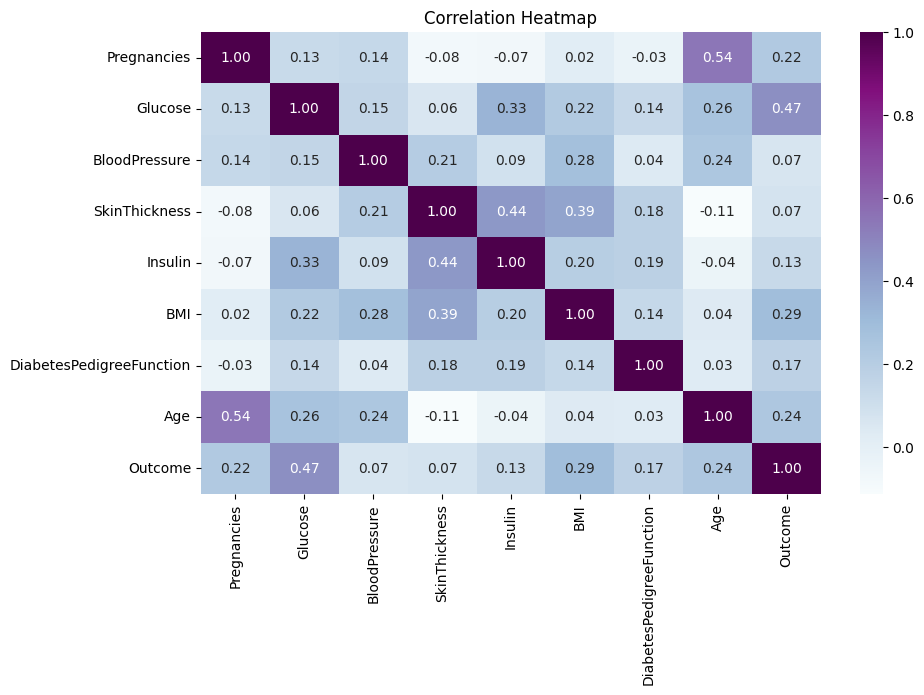

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="BuPu", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# 1 as has , 0 as not
#balance of the target variable, which indicates whether a patient has diabetes or not

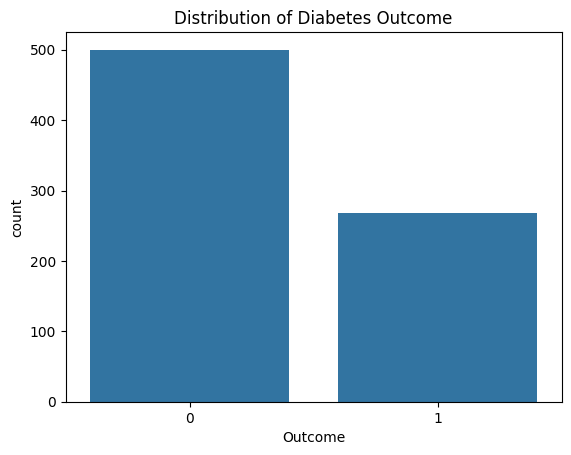

In [ ]:
sns.countplot(x='Outcome', data=df)
plt.title('Distribution of Diabetes Outcome')
plt.show()

In [ ]:
X = df.iloc[:, 0:8]  #all columns
y = df['Outcome']

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# bulid model
model = GaussianNB()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)


In [ ]:
# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


Accuracy: 0.7662337662337663
Confusion Matrix:
[[79 20]
 [16 39]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.80      0.81        99
           1       0.66      0.71      0.68        55

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154



<Figure size 800x600 with 0 Axes>

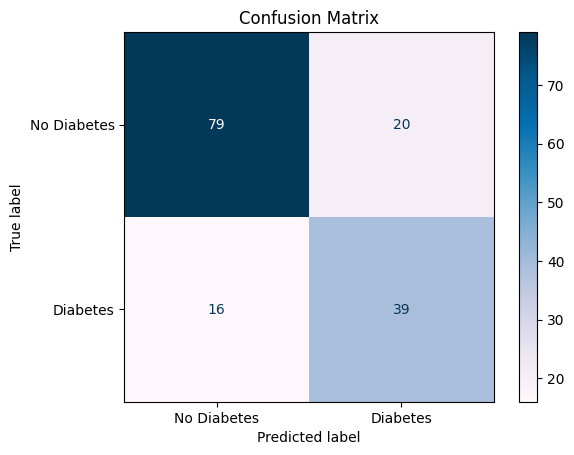

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['No Diabetes', 'Diabetes'])

plt.figure(figsize=(8, 6))
cmd.plot(cmap='PuBu')
plt.title('Confusion Matrix')
plt.show()

Now we apply Random Frorest to compare between the two models

In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


Accuracy: 0.7207792207792207
Confusion Matrix:
[[77 22]
 [21 34]]
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.78      0.78        99
           1       0.61      0.62      0.61        55

    accuracy                           0.72       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.72      0.72      0.72       154



As we can see the accuracy is quite similar but the Naive Bayes is a bit higher

<Figure size 800x600 with 0 Axes>

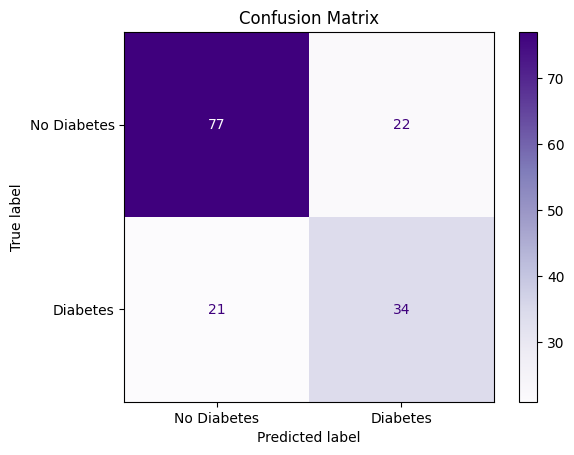

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['No Diabetes', 'Diabetes'])

plt.figure(figsize=(8, 6))
cmd.plot(cmap='Purples')
plt.title('Confusion Matrix')
plt.show()